In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Setting up things to be hard coded.

In [2]:
### the rmax and charge
Rqdata = pd.read_csv("Work",usecols=[1,2])


### Point spread regular

,Radius (m),Total charge (C),Charge per Point
0,0.000100,2.987657e+03,0.000000e+00
1,0.000141,1.034684e+03,0.000000e+00
2,0.000173,6.771606e+02,6.771606e+01
3,0.000200,4.874315e+02,4.874315e+01
4,0.000224,3.667940e+02,3.667940e+01
...,...,...,...
300,0.001735,2.729252e-19,2.729252e-21
301,0.001738,2.328247e-19,2.328247e-21
302,0.001741,1.986172e-19,1.986172e-21
303,0.001744,1.694365e-19,1.694365e-21


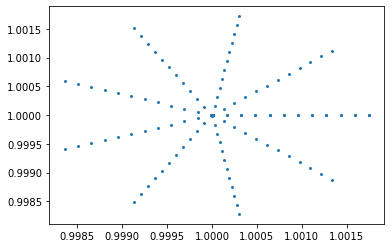

In [3]:
electronpos= [1,1]
points = 120
rmax = 0.001746
ppa = 10 #number of points per annulie
valuesr = np.linspace(0.00001,rmax,int(points/ppa))
pirange = np.linspace(0.00001,2*np.pi,int(ppa))
x = np.array([])
y = np.array([])

for theta in pirange:
    x=np.append(x,valuesr*np.cos(theta)+electronpos[0])
    y=np.append(y,valuesr*np.sin(theta)+electronpos[1])
plt.scatter(x,y,marker=".",lw=0.01)


#Charge per point
rad= Rqdata.iloc[:,0]
Totcharge = Rqdata.iloc[:,1]
count = 0
cpp = np.array([0,]) #charge per point in coulombs
for i in range(1,len(rad)):
    for cur in valuesr:
        if cur > rad[i-1] and cur< rad[i]:
            count += ppa
    if count > 0:
        cpp = np.append(cpp,Totcharge[i]/count)
    else:
        cpp = np.append(cpp,0)

Cppreg=Rqdata
Cppreg["Charge per Point"] = pd.Series(cpp)
Cppreg

### Point spread rand

,Radius (m),Total charge (C),Charge per Point
0,0.000100,2.987657e+03,7.469143e+02
1,0.000141,1.034684e+03,1.724473e+02
2,0.000173,6.771606e+02,8.464507e+01
3,0.000200,4.874315e+02,6.092894e+01
4,0.000224,3.667940e+02,4.075489e+01
...,...,...,...
300,0.001735,2.729252e-19,4.264457e-21
301,0.001738,2.328247e-19,3.637886e-21
302,0.001741,1.986172e-19,3.103394e-21
303,0.001744,1.694365e-19,2.647446e-21


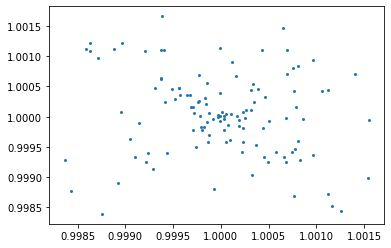

In [4]:

#point plotting
rrange = np.random.uniform(-rmax,rmax,points)
xtest = rrange*np.cos(np.random.uniform(0,np.pi,points))+electronpos[0]
ytest = rrange*np.sin(np.random.uniform(0,np.pi,points))+electronpos[1]

plt.scatter(xtest,ytest,marker=".",lw=0.01)
#charge per point
rad= np.array([0,])
rad= np.append(rad,Rqdata.iloc[:,0])
Totcharge = Rqdata.iloc[:,1]
count = 0
cpptest = np.array([]) #charge per point in coulombs
for i in range(1,len(rad)):
    for cur in rrange:
        if cur > rad[i-1] and cur< rad[i]:
            count += 1
    if count > 0:
        cpptest = np.append(cpptest,Totcharge[i-1]/count)
    else:
        cpptest = np.append(cpptest,0)
        
Cppran =Rqdata
Cppran["Charge per Point"] = cpptest
Cppran

### point spread normal

,Radius (m),Total charge (C),Charge per Point
0,0.000100,2.987657e+03,5.975314e+01
1,0.000141,1.034684e+03,1.724473e+01
2,0.000173,6.771606e+02,9.673723e+00
3,0.000200,4.874315e+02,6.963307e+00
4,0.000224,3.667940e+02,5.239914e+00
...,...,...,...
300,0.001735,2.729252e-19,2.481138e-21
301,0.001738,2.328247e-19,2.116588e-21
302,0.001741,1.986172e-19,1.805611e-21
303,0.001744,1.694365e-19,1.540332e-21


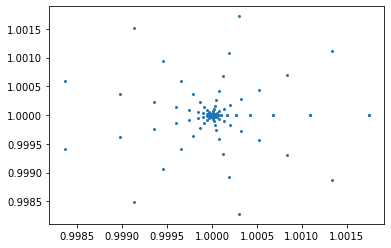

In [5]:

ppa = 10 #number of points per annulie
valuesr = np.logspace(np.log(0.00001), np.log(rmax), int(points / ppa), base=np.exp(1))
pirange = np.linspace(0.00001,2*np.pi,int(ppa))
x1 = np.array([])
y1 = np.array([])
for r in valuesr:
    for theta in pirange:
        x1=np.append(x1,round(r*np.cos(theta),6)+electronpos[0])
        y1=np.append(y1,round(r*np.sin(theta),6)+electronpos[1])
plt.scatter(x1,y1,marker=".",lw=0.01)

### charge per point
rad1= np.array([0,])
rad1= np.append(rad1,Rqdata.iloc[:,0])
Totcharge1 = Rqdata.iloc[:,1]
count1 = 0
cpptest1 = np.array([]) #charge per point in coulombs
for i in range(1,len(rad1)):
    for cur in valuesr:
        if cur > rad1[i-1] and cur< rad1[i]:
            count1 += ppa
    if count1 > 0:
        cpptest1 = np.append(cpptest1,Totcharge1[i-1]/count1)
    else:
        cpptest1 = np.append(cpptest1,0)
        
Cppnorm =Rqdata
Cppnorm["Charge per Point"] = cpptest1
Cppnorm

### Grid of points

,Radius (m),Total charge (C),Charge per Point
0,0.000100,2987.657070,0.000000
1,0.000141,1034.683713,258.670928
2,0.000173,677.160597,0.000000
3,0.000200,487.431482,0.000000
4,0.000224,366.793977,0.000000
5,0.000245,283.279310,0.000000
6,0.000265,222.555476,0.000000
7,0.000283,176.983330,0.000000
8,0.000300,142.024105,17.753013
9,0.000316,114.774057,0.000000


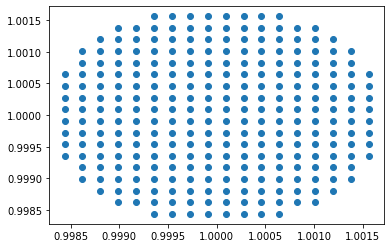

In [16]:
points=400
xgrid=np.linspace(-rmax,rmax,int(np.sqrt(points)))+electronpos[0]
ygrid=np.linspace(-rmax,rmax,int(np.sqrt(points)))+electronpos[1]
xg=[]
yg=[]
for x in xgrid:
    for y in ygrid:
        if (x-electronpos[0])**2+(y-electronpos[1])**2<rmax**2:
            xg.append(x)
            yg.append(y)
plt.scatter(xg,yg)

## Charge per point
rad2= np.array([0,])
rad2= np.append(rad2,Rqdata.iloc[:,0])
Totcharge2 = Rqdata.iloc[:,1]
count2 = 0
cpptest2 = np.array([]) #charge per point in coulombs
for i in range(1,len(rad2)):
    count2=0
    for j in range(0,len(xg)):
        cur2 =np.sqrt((xg[j]-electronpos[0])**2+(yg[j]-electronpos[1])**2)
        if cur2 > rad2[i-1] and cur2< rad2[i]:
            count2 += 1
    if count2 > 0:
        cpptest2 = np.append(cpptest2,Totcharge2[i-1]/count2)
    else:
        cpptest2 = np.append(cpptest2,0)

Cppgrid =Rqdata
Cppgrid["Charge per Point"] = cpptest2
Cppgrid.head(50)